# Pre-processing

## Imports

In [234]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [235]:
df = pd.read_csv("datasets/after_eda_merged.csv")
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,4,3,2010


In [236]:
df_no_date = pd.read_csv("datasets/after_eda_no_date.csv")
df_no_date.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [237]:
date_df = pd.read_csv("datasets/after_eda_date.csv")
date_df.head()

,date,weekday,month,year
0,2010-02-05,4,2,2010
1,2010-02-12,4,2,2010
2,2010-02-19,4,2,2010
3,2010-02-26,4,2,2010
4,2010-03-05,4,3,2010


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   int64  
 3   temperature   6435 non-null   float64
 4   fuel_price    6435 non-null   float64
 5   cpi           6435 non-null   float64
 6   unemployment  6435 non-null   float64
 7   date          6435 non-null   object 
 8   weekday       6435 non-null   int64  
 9   month         6435 non-null   int64  
 10  year          6435 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 553.1+ KB


In [239]:
df.nunique().sort_values()

weekday            1
holiday_flag       2
year               3
month             12
store             45
date             143
unemployment     349
fuel_price       892
cpi             2145
temperature     3528
weekly_sales    6435
dtype: int64

In [240]:
# Numerical and Categorical features
target = "weekly_sales"
features = [i for i in df.columns if i != target]
unique_count = df[features].nunique().sort_values()

numerical_features = []
categorical_features = []

for feature in features:
    if unique_count[feature] <= 45:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [241]:
categorical_features

['store', 'holiday_flag', 'weekday', 'month', 'year']

In [242]:
numerical_features

['temperature', 'fuel_price', 'cpi', 'unemployment', 'date']

In [243]:
numerical_features.remove("date")

In [244]:
numerical_features

['temperature', 'fuel_price', 'cpi', 'unemployment']

**NOTE:**
- As a reminder, the data contains the weekly sales from 45 store across 143 different days.
- Those days are the same for every store for uniformity of data collection (143 days * 45 stores = 6435 records).
- So, technically, the date feature is a categorical feature. However, it isn't relevant to the pre-processing steps we are about to perform as the date has already been pre-processed into weekday, month and year derived features.
- For that reason, it will be ignored for now

In [245]:
print("There are {} numerical & {} categorical features.".format(len(numerical_features),len(categorical_features)))

There are 4 numerical & 5 categorical features.


In [246]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


## Data pre-processing

In [247]:
# Create "un-processed" copy of df before proceeding
original_df = df.copy()

In [248]:
# Removal of any duplicate rows
df.drop_duplicates(inplace=True)

if df.shape == original_df.shape:
    print("The dataset doesn't have any duplicate rows.")
else:
    print(f"The number of duplicates dropped/fixed ---> {original_df.shape[0] - df.shape[0]}.")

The dataset doesn't have any duplicate rows.


In [249]:
# Check for empty elements
null_value_count = pd.DataFrame(df.isnull().sum().sort_values(),columns=["Total Null Values"])
null_value_count["Percentage"] = round(null_value_count["Total Null Values"]/df.shape[0],3)*100
null_value_count

,Total Null Values,Percentage
store,0,0.0
weekly_sales,0,0.0
holiday_flag,0,0.0
temperature,0,0.0
fuel_price,0,0.0
cpi,0,0.0
unemployment,0,0.0
date,0,0.0
weekday,0,0.0
month,0,0.0


- There are no null values.

In [250]:
numerical_features

['temperature', 'fuel_price', 'cpi', 'unemployment']

In [251]:
# Removal of outliers
df_no_outliers = df.copy()

for i in numerical_features:
    Q1 = df_no_outliers[i].quantile(0.25)
    Q3 = df_no_outliers[i].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df_no_outliers[df_no_outliers[i] <= (Q3+(1.5*IQR))]
    df_no_outliers = df_no_outliers[df_no_outliers[i] >= (Q1-(1.5*IQR))]
    df_no_outliers = df_no_outliers.reset_index(drop=True)

print("NOTE:")
print("Before removal of outliers, the dataset had {} samples.".format(df.shape[0]))
print("After removal of outliers, the dataset now has {} samples.".format(df_no_outliers.shape[0]))
display(df_no_outliers)

NOTE:
Before removal of outliers, the dataset had 6435 samples.
After removal of outliers, the dataset now has 5951 samples.


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,4,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
5946,45,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,4,9,2012
5947,45,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,4,10,2012
5948,45,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,4,10,2012
5949,45,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,4,10,2012


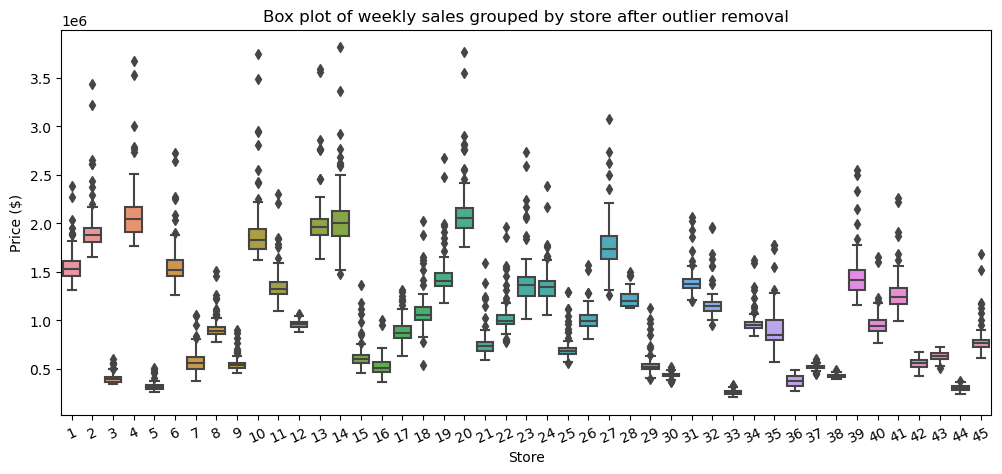

In [252]:
# Boxplot following the removal of outliers
plt.subplots(figsize=(12,5))
sns.boxplot(x="store",y="weekly_sales",data=df_no_outliers)
plt.xticks(rotation=25)
plt.title("Box plot of weekly sales grouped by store after outlier removal")
plt.ylabel("Price ($)")
plt.xlabel("Store")
plt.show()

In [253]:
# Final dataset size after preprocessing
df = df_no_outliers.copy()

number_of_dropped_rows = original_df.shape[0]-df.shape[0]
percentage_of_dropped_rows = (number_of_dropped_rows/original_df.shape[0]) * 100
percentage_of_dropped_rows = round(percentage_of_dropped_rows, 2)

print("NOTE:")
print(f"After cleaning, {number_of_dropped_rows} or {percentage_of_dropped_rows}% of the samples were dropped.")
display(df)

NOTE:
After cleaning, 484 or 7.52% of the samples were dropped.


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,4,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
5946,45,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,4,9,2012
5947,45,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,4,10,2012
5948,45,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,4,10,2012
5949,45,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,4,10,2012


## Splitting and Standardization

In [254]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,4,3,2010


In [255]:
df_pre_split = df.copy()

In [256]:
df = df.drop(["date", "weekday", "store", "year"], axis=1)
df.head()

,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,month
0,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1554806.68,0,46.50,2.625,211.350143,8.106,3


**NOTE:**
- We made a copy of the dataframe before splitting/standardization (called `df_pre_split`).
- We then removed the `date`, `weekday`, `store`, `year` features.
    - We removed the `store` feature as we consider all 45 locations to be within the same market segment. Thus, store to store differences are not essential for predicting overall weekly sales.
    - As stated prior, the `weekday` contains only 4 as all data was collated on Fridays.
    - The `date` feature can be removed for now. If time series analysis is needed later, it can be re-introduced. It will also hinder standardization which requires numeric data. The same goes for the `year` feature.

In [257]:
# Training and Testing sets
X = df.drop(target, axis=1)
y = df[target]
Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True, inplace=True)

In [258]:
print("Original set  --->", X.shape, y.shape)
print("\nTraining set  --->", Train_X.shape, Train_y.shape)
print("\nTesting set   --->", Test_X.shape, Test_y.shape)

Original set  ---> (5951, 6) (5951,)

Training set  ---> (4760, 6) (4760,)

Testing set   ---> (1191, 6) (1191,)


In [259]:
# Standardization/scaling of features
cols_to_scale = ["temperature", "fuel_price", "cpi", "unemployment"]
std = StandardScaler()

Train_X_std = Train_X.copy()
Test_X_std = Test_X.copy()

Train_X_std[cols_to_scale] = std.fit_transform(Train_X_std[cols_to_scale])
Test_X_std[cols_to_scale] = std.transform(Test_X_std[cols_to_scale])

display(Train_X_std.head())
display(Train_X_std.describe())
display(Test_X_std.head())
display(Test_X_std.describe())

,holiday_flag,temperature,fuel_price,cpi,unemployment,month
0,0,1.387482,0.997707,-1.172478,0.428047,8
1,0,-0.433635,-1.017613,0.976518,-0.579850,12
2,0,1.664716,1.026030,-1.175951,0.619144,6
3,0,-0.174411,0.402915,-1.184842,-1.435354,4
4,0,0.793177,1.073962,0.867124,-0.364563,7


,holiday_flag,temperature,fuel_price,cpi,unemployment,month
count,4760.000000,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4760.000000
mean,0.069748,3.381049e-16,-2.573105e-16,-1.970413e-16,1.470346e-16,6.482983
std,0.254748,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,3.235020
min,0.000000,-2.765561e+00,-1.882567e+00,-1.253019e+00,-2.756102e+00,1.000000
25%,0.000000,-7.381554e-01,-9.805747e-01,-1.081047e+00,-6.733832e-01,4.000000
50%,0.000000,1.104625e-01,1.676130e-01,3.832999e-01,1.014883e-01,7.000000
75%,0.000000,7.716204e-01,8.364814e-01,9.915222e-01,6.191444e-01,9.000000
max,1.000000,2.180435e+00,2.466167e+00,1.338949e+00,2.580110e+00,12.000000


,holiday_flag,temperature,fuel_price,cpi,unemployment,month
411,0,1.431687,-0.109085,1.295626,-0.856417,6
5040,1,-0.422175,-0.856387,0.906294,0.604631,12
3186,0,0.023145,1.226473,-0.988542,0.509485,9
1379,0,0.105005,2.041316,-1.130774,-0.146051,3
4721,1,1.112978,-1.793239,0.908392,0.511098,9


,holiday_flag,temperature,fuel_price,cpi,unemployment,month
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.072208,0.036099,0.037806,0.007451,-0.022689,6.444165
std,0.258941,1.024013,0.982381,1.009229,1.009840,3.241283
min,0.000000,-2.877436,-1.793239,-1.253019,-2.756102,1.000000
25%,0.000000,-0.668574,-0.930464,-1.081222,-0.688300,4.000000
50%,0.000000,0.163945,0.226439,0.384170,0.074074,6.000000
75%,0.000000,0.846932,0.823409,1.012806,0.633658,9.000000
max,1.000000,2.071834,2.466167,1.343977,2.580110,12.000000


**NOTE:**
- The `holiday_flag` feature is already one-hot encoded to 1's and 0's and, as such, does not need standardization.
- Additionally, we will not standardize the `month` feature either.
    - Its scale is natural numbers from 1 to 12 and this is adequate for now.
    - If needed, standardization or one-hot encoding can be done later.
- We fit the scaler using the training data only then used the scalar to transform the test data.
    - This was done so the training data remains completely unrelated to/unaffected by the test data.

## Feature reduction

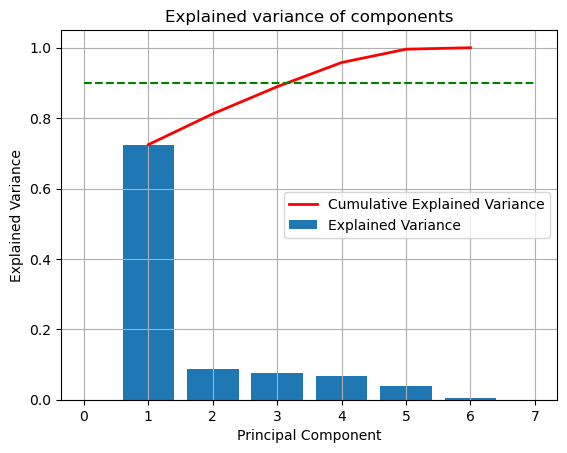

In [261]:
# PCA decomposition
pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots()
x_values = range(1, pca.n_components_ + 1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label="Explained Variance")
ax.plot(x_values,np.cumsum(pca.explained_variance_ratio_),lw=2,label="Cumulative Explained Variance",color="red")
plt.plot([0, pca.n_components_+1], [0.9, 0.9], "g--")

ax.set_title("Explained variance of components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")

plt.legend()
plt.grid()
plt.show()

- We see that 90% of the variance is explained by around 3 components.

**NOTE:**
- We haven't gotten to modeling yet but we can create a preliminary linear regression model and calculate the RMSE depending on how many principal components we opt for in our data (1 to 6).
- We will do this for training and test set.

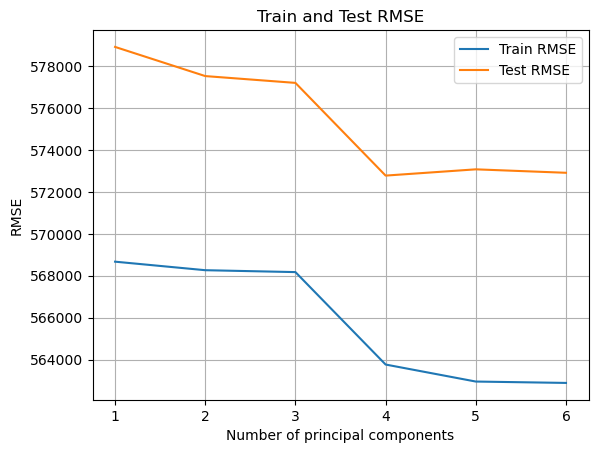

In [262]:
# RMSE from PCA
training_errors = []
test_errors = []

column_count = Train_X_std.shape[1]

for i in range(column_count):
    pca = PCA(n_components=i+1)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca,Train_y)
    
    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)
    
    training_errors.append(round(np.sqrt(mean_squared_error(Train_y,pred1)),2))
    test_errors.append(round(np.sqrt(mean_squared_error(Test_y,pred2)),2))

plt.plot(range(1,7), training_errors,label="Train RMSE")
plt.plot(range(1,7), test_errors,label="Test RMSE")
plt.xlabel("Number of principal components")
plt.ylabel("RMSE")
plt.title("Train and Test RMSE")
plt.legend()
plt.grid()
plt.show()

- As expected, the RMSE is lower for training data than testing data.
- RMSE also reduces with increasing number of principal components.

## Saving data

**NOTE:**
- The code below can be un-commented if saving is required.

In [263]:
from library.sb_utils import save_file
datapath = "datasets"
dataframes = [Train_X, Train_X_std, Test_X, Test_X_std, Train_y, Test_y, df_pre_split]
dataframes_str = ["Train_X","Train_X_std","Test_X","Test_X_std","Train_y","Test_y","after_pre_processing_no_split"]

for i in range(len(dataframes)):
    save_file(dataframes[i], f"{dataframes_str[i]}.csv", datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Train_X.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Train_X_std.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Test_X.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Test_X_std.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Train_y.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Test_y.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_pre_processing_no_split.csv"
